# The Sparks Foundation - GRIP - Data Science and Business Analytics -
# January 2022

# Task 1 :- Prediction Using Supervised ML

# Author : Ritesh Meshram

In [1]:
# Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Reading data from url

In [2]:
student_score = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
student_score.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student_score.shape #shape of dataset

(25, 2)

In [4]:
student_score.describe().T #statistical values. T is used for transpose

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


C:\Users\ritesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

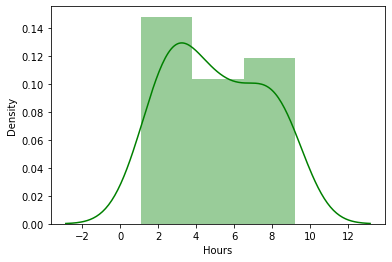

In [5]:
#distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.
sns.distplot(student_score['Hours'],label='hour',color='green')

C:\Users\ritesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

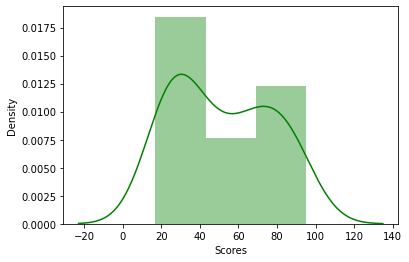

In [6]:
#distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.
sns.distplot(student_score['Scores'],label='Scores',color='green' )

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

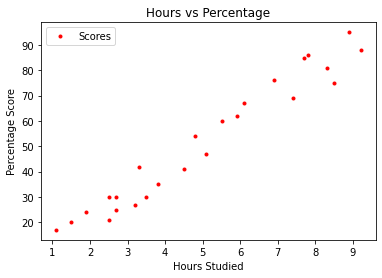

In [7]:
# Plotting the distribution of scores
student_score.plot(x='Hours', y='Scores', style='.', color= 'red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x = student_score.iloc[:, :-1].values  
y = student_score.iloc[:, 1].values  
y.shape, x.shape

((25,), (25, 1))

In [9]:
#split this data into training and test sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, random_state=0)

### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

###  Plotting the regression line

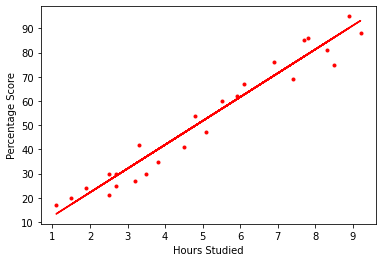

In [11]:
# Plotting the regression line
line = reg.coef_ * x + reg.intercept_

# Plotting for the test data
plt.scatter(x, y, color='red', marker='.')
plt.plot(x, line, color= 'red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### Making Predictions

In [12]:
y_pred=reg.predict(x_test) # predicted testset values
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


now ploting it in graph

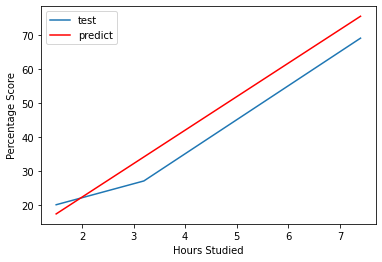

In [13]:
plt.plot(x_test,y_test,label="test")
plt.plot(x_test,y_pred,color="red",label="predict")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
leg=plt.legend()
plt.show()

### You can also test with your own data

In [14]:
hours = [[2],[5.4],[8],[9]]
own_pred = reg.predict(hours)
print("No of Hours studied = {}".format(hours))
print("Predicted Score  = {}".format(own_pred))

No of Hours studied = [[2], [5.4], [8], [9]]
Predicted Score  = [22.22958753 55.73575592 81.35811999 91.2128754 ]


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.399450313612007
